In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime



# from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
# Reading Data :

df_purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

df_transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

#### Main idea about task :
-Creating and interpreting high level summaries of the data

-Finding outliers and removing these (if applicable)

-Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment.

<h3>Examine transaction data </h3> 
 Check for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

In [4]:
df_transaction_data.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [3]:
df_transaction_data.sample(n=10)        # Print random 10 rows.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
82650,43516,23,23219,20050,74,Tostitos Splash Of Lime 175g,2,8.8
85079,43497,60,60191,56959,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
4350,43379,231,231272,234781,90,Tostitos Smoked Chipotle 175g,2,8.8
12079,43639,156,156213,158062,111,Smiths Chip Thinly Cut Original 175g,2,6.0
162461,43376,152,152160,151286,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2
112093,43570,184,184207,187594,69,Smiths Chip Thinly S/Cream&Onion 175g,2,6.0
153425,43423,33,33063,29817,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2
254828,43523,222,222045,221756,80,Natural ChipCo Sea Salt & Vinegr 175g,2,6.0
94394,43635,199,199221,198546,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6
177523,43540,110,110147,112514,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2


In [5]:
# Formating a Date : Converting Excel integer Date to Normal Date

df_transaction_data['DATE'] = df_transaction_data['DATE'].apply(lambda x: datetime.fromordinal(datetime(1900,1,1).toordinal()+x-2).date())

In [6]:
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
df_transaction_data['STORE_NBR'].nunique()              # 272 Stores.

272

In [12]:
df_transaction_data['LYLTY_CARD_NBR'].nunique()         # 72637 are regular customers.

72637

In [8]:
df_transaction_data['TXN_ID'].nunique()
# Total number of TXN_ID is greter then number of unique id , because customer may buy multiple products of different brand from super markets at once.

263127

In [9]:
print(len(df_transaction_data[df_transaction_data.duplicated(['TXN_ID'])]))     # 1709 are duplicate tax_ids.

df_transaction_data[df_transaction_data.duplicated(['TXN_ID'])].head()

1709


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [10]:
df_transaction_data.loc[df_transaction_data['TXN_ID'] == 16683, :]
# Here we can see the cutomer had buy 2 different product at same day ,but the product is entered in data set based on different brand.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
510,2018-08-03,19,19272,16683,7,Smiths Crinkle Original 330g,2,11.4
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [15]:
df_transaction_data['PROD_NBR'].nunique()           # All 272 stores have 114 unique product.

114

In [16]:
chips = df_transaction_data[df_transaction_data['PROD_NAME'].str.contains('Chips')]        # Finding chips of products.

chips['PROD_NAME'].value_counts()       # with number of packet is sell.

Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Cobs Popd Sea Salt  Chips 110g              3265
Thins Potato Chips  Hot & Spicy 175g        3229
Doritos Corn Chips  Cheese Supreme 170g     3217
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Doritos Corn Chips  Nacho Cheese 170g       3160
Cobs Popd Sour Crm  &Chives Chips 110g      3159
Doritos Corn Chips  Original 170g           3121
Thins Chips Seasonedchicken 175g            3114
Thins Chips Salt &  Vinegar 175g            3103
WW Supreme Cheese   Corn Chips 200g         1509
WW Original Corn    Chips 200g              1495
Smiths Crinkle Cut  Chips Barbecue 170g     1489
WW Original Stacked Chips 160g              1487
Smiths Crinkle Cut  Chips Chicken 170g      1484
WW Sour Cream &OnionStacked Chips 160g      1483
Smiths Crinkle Cut  Chips Chs&Onion170g     1481
Smiths Crinkle Cut  Chips Original 170g     1461
Thins Chips         Originl saltd 175g      1441
French Fries Potato 

In [17]:
df_transaction_data['PROD_QTY'].value_counts()          # More customers are buy in

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [12]:
df_transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [27]:
df_transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

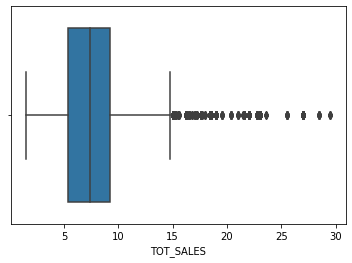

In [25]:
sns.boxplot(df_transaction_data.TOT_SALES)

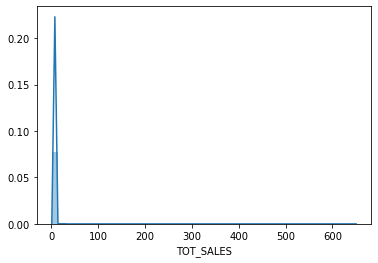

In [14]:
sns.distplot(df_transaction_data.TOT_SALES , kde=True)

In [19]:
df_transaction_data[df_transaction_data['TOT_SALES'] > 100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [20]:
# This person only made two transaction over year the entire year so unlikely to be a retailer customer.
# He or she likely to purchasing for commercial purpose so safe to drop these this customer from both data set. 

df_transaction_data.drop(df_transaction_data.index[df_transaction_data['LYLTY_CARD_NBR']==226000],inplace = True)
df_purchase_behaviour.drop(df_purchase_behaviour.index[df_purchase_behaviour['LYLTY_CARD_NBR']==226000],inplace = True)

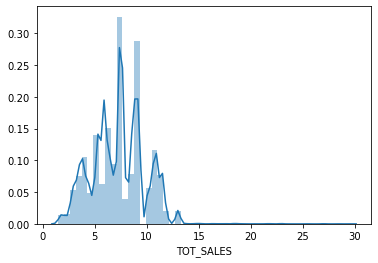

In [22]:
sns.distplot(df_transaction_data.TOT_SALES, kde=True)

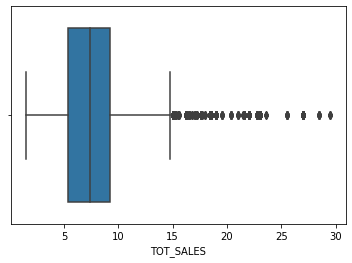

In [23]:
sns.boxplot(df_transaction_data.TOT_SALES)

In [29]:
df_transaction_data['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [31]:
df_transaction_data['PACK_SIZE'] = df_transaction_data['PROD_NAME'].str.extract("(\d+)")
df_transaction_data['PACK_SIZE'] = pd.to_numeric((df_transaction_data['PACK_SIZE']))
df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [34]:
# Removing packet weights from PROD_NBR :
import re
def clean_text(text) :
    text = re.sub('\d\w' , ' ',text) # Removing product weights
    return text

df_transaction_data['PROD_NAME'] = df_transaction_data['PROD_NAME'].apply(clean_text)

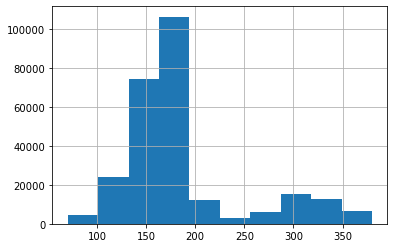

In [72]:
df_transaction_data['PACK_SIZE'].hist()

In [43]:
df_transaction_data['PROD_NAME'] = df_transaction_data['PROD_NAME'].apply(lambda x : x.lower())
df_transaction_data = df_transaction_data[~df_transaction_data['PROD_NAME'].str.contains('salasa')]
df_transaction_data['PROD_NAME']=df_transaction_data['PROD_NAME'].apply(lambda x:x.title())
df_transaction_data.shape

(264834, 9)

In [44]:
# Extract brand name from 'PROD_NAME'

part  = df_transaction_data['PROD_NAME'].str.partition()
df_transaction_data['BRAND']=part[0]

df_transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,Ccs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla Chpshny&Jlpno Chili,3,13.8,150,Kettle


In [45]:
df_transaction_data['BRAND'].unique()

array(['Natural', 'Ccs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'Ww', 'Thins', 'Burger', 'Ncc', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'Grnwves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'Rrd', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [48]:
# As we can see the names are same like (Ccs , CCS) , (Simth ,Smiths) , (Grain,Grnwves) ,(Natural , Ncc) etc,
# therefor we renaming the brand name  

df_transaction_data['BRAND'].replace('Red','Rrd',inplace=True)
df_transaction_data['BRAND'].replace('Ww','Woolworths',inplace=True)
df_transaction_data['BRAND'].replace('Smith','Smiths',inplace=True)
df_transaction_data['BRAND'].replace(['Grain','Grnwves'],'Grainuraves',inplace=True)
df_transaction_data['BRAND'].replace('Dorito','Doritos',inplace=True)
df_transaction_data['BRAND'].replace('Ncc','Natural',inplace=True)
df_transaction_data['BRAND'].replace('Ccs','CCS',inplace=True)
df_transaction_data['BRAND'].replace('Infzns','Infuzions',inplace=True)
df_transaction_data['BRAND'].replace('Snbts','Sunbites',inplace=True)

df_transaction_data['BRAND'].unique()

array(['Natural', 'CCS', 'Smiths', 'Kettle', 'Old', 'Grainuraves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Rrd', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [77]:
df_transaction_data.groupby('BRAND').PROD_QTY.sum().sort_values(ascending=False).to_frame()     # find which brand is most customer buy.

,PROD_QTY
BRAND,
Kettle,79051
Smiths,60339
Doritos,53816
Pringles,48019
Rrd,33646
Woolworths,27856
Infuzions,27119
Thins,26929
Cobs,18571


In [76]:
df_transaction_data.groupby('BRAND').TOT_SALES.sum().sort_values(ascending=False).to_frame()     # find which brand have more revenu.

,TOT_SALES
BRAND,
Kettle,390239.8
Doritos,240590.9
Smiths,224660.2
Pringles,177655.5
Infuzions,99047.6
Rrd,95046.0
Old,90785.1
Thins,88852.5
Twisties,81522.1


In [59]:
df_transaction_data['DATE'].nunique()       # Finding the day the store is open or not using the unique dates.

364

In [60]:
pd.date_range(start='2018-07-01', end='2019-06-30').difference(df_transaction_data['DATE'])  # On which date the store is closed?
# 2018-12-25 all stores are closed on christmas holiday.

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [61]:
a = pd.pivot_table(df_transaction_data,values='TOT_SALES',index='DATE',aggfunc='sum')       # make df of total sale with date.
a.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


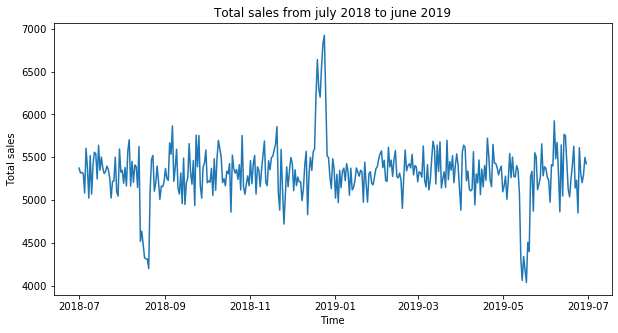

In [63]:
from matplotlib.dates import DateFormatter

timeline = a.index
graph = a['TOT_SALES']
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(timeline,graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total sales from july 2018 to june 2019')
plt.xlabel('Time')
plt.ylabel('Total sales')

plt.show()

In [68]:
b = pd.DataFrame(index=pd.date_range(start='2018-07-01' , end='2019-06-30'))
b['TOT_SALES'] = 0

In [69]:
c = a+b
c.fillna(0,inplace=True)
c.head()

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [81]:
c.index.name = 'DATE'
c.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


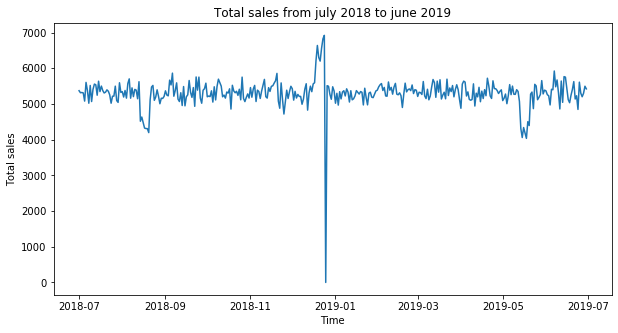

In [82]:
timeline = c.index
graph = c['TOT_SALES']
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(timeline,graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total sales from july 2018 to june 2019')
plt.xlabel('Time')
plt.ylabel('Total sales')

plt.show()

In [83]:
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,TOT_SALES
DATE,
2018-12-01,5427.6
2018-12-02,5108.2
2018-12-03,5353.3
2018-12-04,5167.3
2018-12-05,5268.0


Text(0.5, 1.0, 'Total Sales in December')

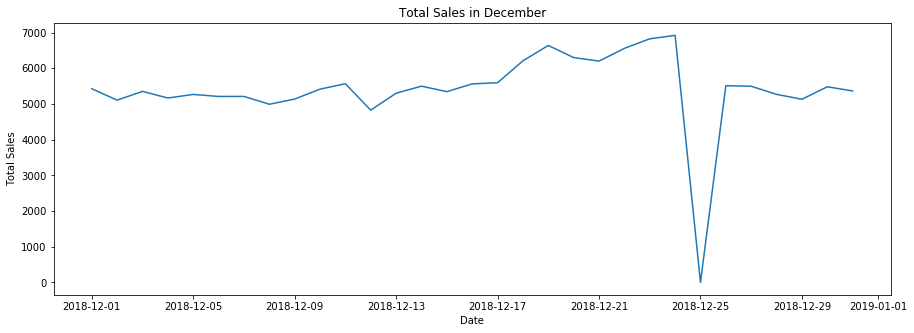

In [84]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')

***
## For Purchase Behaviour data set :

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

In [58]:
df_purchase_behaviour.sample(n=10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
54754,205296,MIDAGE SINGLES/COUPLES,Premium
62087,234034,RETIREES,Premium
49808,186187,OLDER FAMILIES,Budget
61467,232008,OLDER FAMILIES,Budget
22769,82147,YOUNG FAMILIES,Budget
51198,191126,OLDER FAMILIES,Mainstream
42946,162172,OLDER FAMILIES,Budget
3446,12239,OLDER SINGLES/COUPLES,Premium
51916,195233,OLDER SINGLES/COUPLES,Premium
48405,181194,OLDER SINGLES/COUPLES,Premium


In [60]:
df_purchase_behaviour[df_purchase_behaviour['LYLTY_CARD_NBR']==226263]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
59955,226263,RETIREES,Budget


In [85]:
df_purchase_behaviour['LYLTY_CARD_NBR'].nunique()

72636

In [86]:
df_purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72636 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72636 non-null  int64 
 1   LIFESTAGE         72636 non-null  object
 2   PREMIUM_CUSTOMER  72636 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [87]:
for column in ['LIFESTAGE' , 'PREMIUM_CUSTOMER']:
    print(column)
    print(df_purchase_behaviour[column].value_counts())
    print('')

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9779
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18921
Name: PREMIUM_CUSTOMER, dtype: int64



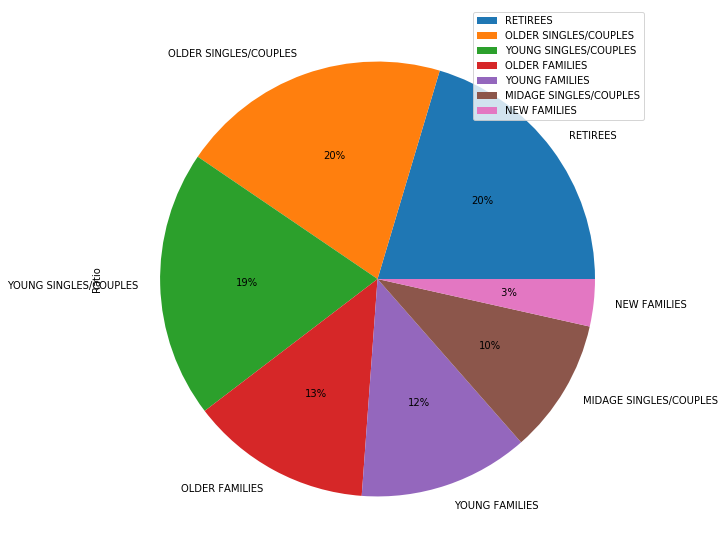

In [89]:
df = pd.DataFrame({'Ratio': [14805, 14609 , 14441,9780,9178,7275,2549]},
                  index=['RETIREES', 'OLDER SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES' , 'OLDER FAMILIES','YOUNG FAMILIES','MIDAGE SINGLES/COUPLES' ,'NEW FAMILIES'])
plot = df.plot.pie(y='Ratio', autopct='%2d%%' ,figsize=(10, 10))

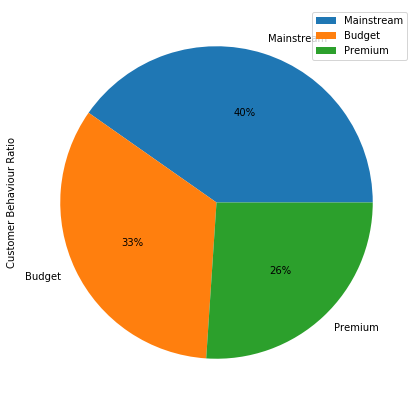

In [91]:
df = pd.DataFrame({'Customer Behaviour Ratio': [29245, 24470 , 18922]},
                  index=['Mainstream', 'Budget', 'Premium'])
plot = df.plot.pie(y='Customer Behaviour Ratio', autopct='%2d%%' ,figsize=(7, 8))

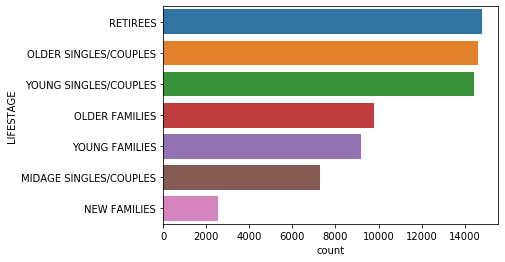

In [66]:
sns.countplot(y=df_purchase_behaviour['LIFESTAGE'], order=df_purchase_behaviour['LIFESTAGE'].value_counts().index)

In [68]:
df_purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

***
## Merging :

In [92]:
combineData = pd.merge(df_transaction_data,df_purchase_behaviour)
combineData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,Ccs Nacho Cheese,3,6.3,175,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,Ww Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,Ccs Original,1,2.1,175,CCS,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [93]:
combineData.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Data Analysis on customer segments :

Now that our data is ready for analysis , we can define metrics of interest to the client.

- Who spends the most on chips describing customer by lifestage and how premuim their general purchasing behaviour is
- How many customer are in each segments
- How many chips are bought per customer by segments
- What is the average chips price by customer segments


In [96]:
sales = pd.DataFrame(combineData.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).TOT_SALES.sum())     
# Finding Which segments of customer have high total sales by grouping on lifestage and premium customers.

sales.sort_values(by='TOT_SALES',ascending=False , inplace=True)

sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          168363.25
Mainstream       YOUNG SINGLES/COUPLES   157621.60
                 RETIREES                155677.05
Budget           YOUNG FAMILIES          139345.85
                 OLDER SINGLES/COUPLES   136769.80
Mainstream       OLDER SINGLES/COUPLES   133393.80
Premium          OLDER SINGLES/COUPLES   132263.15
Budget           RETIREES                113147.80
Mainstream       OLDER FAMILIES          103445.55
Premium          RETIREES                 97646.05
Mainstream       YOUNG FAMILIES           92788.75
                 MIDAGE SINGLES/COUPLES   90803.85
Premium          YOUNG FAMILIES           84025.50
                 OLDER FAMILIES           80658.40
Budget           YOUNG SINGLES/COUPLES    61141.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 YOUNG SINGLES/COUPLES    41642.10
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
Mainstream       NEW FAMILIES             17013.90
Premium          NEW FAMILIES             11491.10

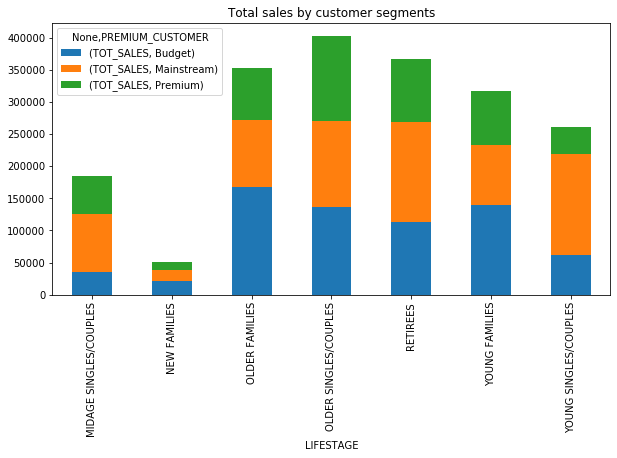

In [73]:
salesplot = pd.DataFrame(combineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).TOT_SALES.sum())

salesplot.unstack().plot(kind='bar',stacked=True,figsize=(10,5),title='Total sales by customer segments')

# As we can see the chart , max sales are comming from 
# 'older singles/couples - 'Premium' , 
# 'retirees - Mainstream' , 
# 'young families - Budget' , 
# 'older families'- Budget. 

In [98]:
customer = pd.DataFrame(combineData.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LYLTY_CARD_NBR.nunique())
# Check if the higher sales are due to there being more customer or they buy more chips ?

customer.rename(columns={'LYLTY_CARD_NBR' : 'NUMBER_OF_CUSTOMER'} , inplace=True)       

customer.sort_values(by='NUMBER_OF_CUSTOMER',ascending=False).head(10)

NUMBER_OF_CUSTOMER
PREMIUM_CUSTOMER LIFESTAGE                                
Mainstream       YOUNG SINGLES/COUPLES                8088
                 RETIREES                             6479
                 OLDER SINGLES/COUPLES                4930
Budget           OLDER SINGLES/COUPLES                4929
Premium          OLDER SINGLES/COUPLES                4750
Budget           OLDER FAMILIES                       4675
                 RETIREES                             4454
                 YOUNG FAMILIES                       4017
Premium          RETIREES                             3872
Budget           YOUNG SINGLES/COUPLES                3779

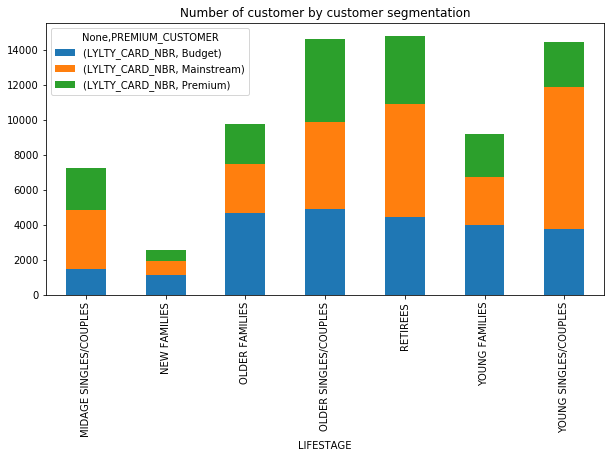

In [78]:
customerPlot = pd.DataFrame(combineData.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())

customerPlot.unstack().plot(kind='bar',stacked=True,figsize=(10,5),title='Number of customer by customer segmentation')

# There are more 'young single/couple' and 'retirees' - mainstream, this cotribution to more chips sales in these.
# segments however this is not the major driver for the budget older families segments

In [102]:
# Now we let's check the customer is buying more chips or not ; with average units per customer by 'PREMIUM_CUSTOMER' and 'LIFESTAGE'.

avg_Units = combineData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / combineData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()

avg_Units = pd.DataFrame(avg_Units, columns = {'AVERAGE_UNIT_PER_CUSTOMER'})

avg_Units.sort_values(by = 'AVERAGE_UNIT_PER_CUSTOMER', ascending = False).head()

,,AVERAGE_UNIT_PER_CUSTOMER
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.804309
Budget,OLDER FAMILIES,9.639572
Premium,OLDER FAMILIES,9.578091
Budget,YOUNG FAMILIES,9.238486
Premium,YOUNG FAMILIES,9.209207
